In [627]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
# from sklearn.metrics import f1_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import Ridge ,Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings


import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [628]:
df=pd.read_csv("/content/Walmart_Store_sales.csv")

In [629]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

Number of rows : 150



In [630]:
print("Display of dataset: ")
display(df.head())
print()

Display of dataset: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [631]:
print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [632]:
#missing values checking nd count
df.isnull().any().value_counts()

True     7
False    1
dtype: int64

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [634]:
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [635]:
n,m=df.shape

In [636]:
year=[]
day=[]
month=[]
for i in range(n):
  if df['Date'].isnull()[i]==False:
    h=df['Date'][i]
    year.append(h.split("-")[0])
    month.append(h.split("-")[1])
    day.append(h.split("-")[2])
  else:
    year.append(np.nan)
    month.append(np.nan)
    day.append(np.nan)


In [637]:
df['year']=year
df['month']=month
df['day']=day
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858,18,02,2011
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,03,2011
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936,27,07,2012
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,05,2010


In [638]:
#checking cols before droping
print('nbr of missin values in col Date ',df['Date'].isnull().sum())

nbr of missin values in col Date  18


In [639]:
print('lets copy data to work on ')
df2=df.copy()

lets copy data to work on 


In [640]:
#drop date col
print("drop in progress...")
df2=df2.drop(['Date'],axis=1)

drop in progress...


In [641]:
print('Drop done')
display(df2.head())

Drop done


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,6.0,1572117.54,NaN,59.61,3.045,214.777523,6.858,18,02,2011
1,13.0,1807545.43,0.0,42.38,3.435,128.616064,7.470,25,03,2011
2,17.0,NaN,0.0,NaN,NaN,130.719581,5.936,27,07,2012
3,11.0,1244390.03,0.0,84.57,NaN,214.556497,7.346,NaN,NaN,NaN
4,6.0,1644470.66,0.0,78.89,2.759,212.412888,7.092,28,05,2010


In [642]:
#nbr of missin line in weekly slas
df2["Weekly_Sales"].isnull().sum()

14

In [643]:
print('Dropping outliers in Age...')
to_keep = df2['Weekly_Sales'].isnull()!=True # We want keeping positives values or missings
df2 = df2.loc[to_keep,:] 
print('Done. Number of lines remaining : ', df2.shape[0])
print()


Dropping outliers in Age...
Done. Number of lines remaining :  136



In [644]:
df2["Weekly_Sales"].isnull().sum()

0

In [645]:
df2["Store"].value_counts()

3.0     12
18.0    10
13.0     9
14.0     9
1.0      9
7.0      8
19.0     8
5.0      8
2.0      8
17.0     7
6.0      6
8.0      6
4.0      6
20.0     5
12.0     5
10.0     5
15.0     4
16.0     4
9.0      4
11.0     3
Name: Store, dtype: int64

In [646]:
fig = px.histogram(x = df2['Weekly_Sales'], nbins = 120, title = "Distribution of Weekly Sales")
fig.show()

<Axes: >

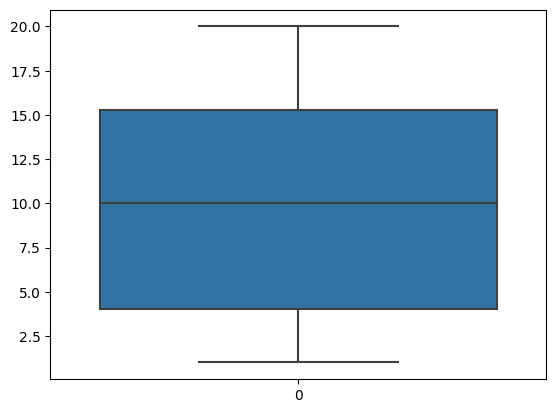

In [647]:
import seaborn as sns
sns.boxplot(df2['Store'])

In [648]:
# Correlation matrix
corr_matrix = df2.corr().round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

<ipython-input-648-e1f33ef2fff5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [649]:
df2.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'year', 'month', 'day'],
      dtype='object')

In [650]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = 'Weekly_Sales'

X = df2.drop(target_variable, axis = 1)
Y = df2.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    1572117.54
1    1807545.43
3    1244390.03
4    1644470.66
5    1857533.70
Name: Weekly_Sales, dtype: float64

X :
   Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0    6.0           NaN        59.61       3.045  214.777523         6.858   
1   13.0           0.0        42.38       3.435  128.616064         7.470   
3   11.0           0.0        84.57         NaN  214.556497         7.346   
4    6.0           0.0        78.89       2.759  212.412888         7.092   
5    4.0           0.0          NaN       2.756  126.160226         7.896   

  year month   day  
0   18    02  2011  
1   25    03  2011  
3  NaN   NaN   NaN  
4   28    05  2010  
5   28    05  2010  


In [651]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=43)
print("...Done.")
print()     

Dividing into train and test sets...
...Done.



In [652]:
# Create pipeline for numeric features
numeric_features = ["Fuel_Price","Unemployment","Temperature","CPI","year","month","day"] # Names of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median',missing_values=np.nan)), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

In [653]:
# analysis
# Distribution of each numeric variable

for i in range(len(numeric_features)):
    fig = px.histogram(df2[numeric_features[i]])
    fig.show()

In [654]:
df2['Store'].shape[0]

136

In [655]:
df2['Store'].value_counts()

3.0     12
18.0    10
13.0     9
14.0     9
1.0      9
7.0      8
19.0     8
5.0      8
2.0      8
17.0     7
6.0      6
8.0      6
4.0      6
20.0     5
12.0     5
10.0     5
15.0     4
16.0     4
9.0      4
11.0     3
Name: Store, dtype: int64

In [656]:
df2['Holiday_Flag'].unique()

array([nan,  0.,  1.])

In [657]:
from sklearn.preprocessing import OrdinalEncoder

# Encode categorical features as an integer array.

# The input to this transformer should be an array-like of integers or strings,
#  denoting the values taken on by categorical (discrete) features. The features are converted
#   to ordinal integers. This results in a single column of integers (0 to n_categories - 1) per feature.

# Create pipeline for categorical features
categorical_features = ['Store', 'Holiday_Flag'] # Names of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ]) 
   

In [658]:
# analysis
# Barplot of each qualitative variable
for i in range(len(categorical_features)):
    fig = px.bar(df2[categorical_features[i]])
    fig.show()

In [659]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [660]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()


Performing preprocessings on train set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
48     1.0           NaN        91.65       3.684  215.544618         7.962   
85     2.0           0.0        44.69       2.976  211.064888         8.028   
24    19.0           0.0        50.76       4.124  138.033200         8.150   
125    3.0           0.0        63.91       3.308  221.643285         7.197   
91    17.0           0.0        68.91       3.630         NaN         5.936   

    year month   day  
48    05    08  2011  
85    07    01  2011  
24    04    05  2012  
125   18    11  2011  
91   NaN   NaN   NaN  
...Done.
  (0, 0)	0.873325821332278
  (0, 1)	0.30010836673036834
  (0, 2)	1.7897254402863787
  (0, 3)	0.9056666165005199
  (0, 4)	-1.3709755546926885
  (0, 5)	0.5223089456034185
  (0, 6)	0.25890435250922367
  (1, 0)	-0.6851596529571025
  (1, 1)	0.3474467109746308
  (1, 2)	-0.8595636262198436
  (1, 3)	0.7907781173095498
  (1, 4)	-1.117004096876

In [661]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on test set...
     Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
94    14.0           0.0        78.47       3.760  186.139981         8.625   
137   10.0           0.0        88.44       3.112  126.128355         9.199   
41    16.0           0.0          NaN       3.659  198.126718         6.061   
88    20.0           0.0        39.79       3.739  213.472512         6.961   
58     6.0           0.0          NaN       2.640  212.894485         6.973   

    year month   day  
94    15    07  2011  
137  NaN   NaN   NaN  
41    14    09  2012  
88   NaN   NaN   NaN  
58    30    07  2010  
...Done.
  (0, 0)	1.0406208722446966
  (0, 1)	0.7756435520932058
  (0, 2)	1.0461643266460035
  (0, 3)	0.15154645466599598
  (0, 4)	-0.1011182656119821
  (0, 5)	0.1999697106024516
  (0, 6)	0.25890435250922367
  (0, 19)	1.0
  (1, 0)	-0.3857895618506684
  (1, 1)	1.1873436974902936
  (1, 2)	1.6086305104847392
  (1, 3)	-1.387529739447798
  (1, 4)	0.

In [662]:
X_train.shape

(108, 27)

In [663]:
# Train model
print("Train model...")
model1 = LinearRegression()
model1.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [664]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = model1.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

Predictions on training set...
...Done.
[1517077.70297626 1902372.01711368 1365659.47952923  496236.83122129
 1031528.58528884]



In [665]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = model1.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Predictions on test set...
...Done.
[2031198.45190686 1731593.32270285  581080.51342062 2025220.44546015
 1613692.11907471]



In [666]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9711489701667677
R2 score on test set :  0.9596655627981019


In [667]:
print("Constant is: ", model1.intercept_)
print("coefficients are: ", model1.coef_) 

print()

Constant is:  1443482.5459199895
coefficients are:  [  -23188.9729943    -96764.8421053    -38210.71727617   136952.89833648
   -32007.26828989    61791.0488185    -34435.69202187   415791.08984579
 -1181262.4261152    810078.99097111 -1312048.16478127    -7028.18131447
  -876303.99221624  -766939.98680136 -1169578.06134135   662855.82208721
    21294.00142392   250097.09069098   691885.23455402   699444.51718932
  -565095.49903651 -1012216.63502318  -529711.49965588   -77468.57436824
   169729.34438947   421504.74462412    -7311.22503885]



In [668]:
model1.coef_

array([  -23188.9729943 ,   -96764.8421053 ,   -38210.71727617,
         136952.89833648,   -32007.26828989,    61791.0488185 ,
         -34435.69202187,   415791.08984579, -1181262.4261152 ,
         810078.99097111, -1312048.16478127,    -7028.18131447,
        -876303.99221624,  -766939.98680136, -1169578.06134135,
         662855.82208721,    21294.00142392,   250097.09069098,
         691885.23455402,   699444.51718932,  -565095.49903651,
       -1012216.63502318,  -529711.49965588,   -77468.57436824,
         169729.34438947,   421504.74462412,    -7311.22503885])

# Each coefficient can be linked with the name of the corresponding feature 



In [669]:
df2['Store'].unique()

array([ 6., 13., 11.,  4., 15., 20., 14.,  3.,  8., 18.,  7.,  1., 17.,
        2.,  5., 19., 16., 12.,  9., 10.])

In [670]:
len(preprocessor.transformers_)

2

In [671]:
preprocessor.transformers_[1][1]

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(drop='first'))])

In [672]:
preprocessor.transformers_[0][2]

['Fuel_Price', 'Unemployment', 'Temperature', 'CPI', 'year', 'month', 'day']

In [673]:
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name != 'num': # if pipeline is for numeric variables
      print(features_list)
      

['Store', 'Holiday_Flag']


In [674]:
len(pipeline.named_steps['encoder'].get_feature_names_out())

20

In [675]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
     
        features = pipeline.named_steps['encoder'].get_feature_names_out(features_list) # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Fuel_Price', 'Unemployment', 'Temperature', 'CPI', 'year', 'month', 'day', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_12.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0']


In [676]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = model1.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
Fuel_Price,-2.318897e+04
Unemployment,-9.676484e+04
Temperature,-3.821072e+04
CPI,1.369529e+05
year,-3.200727e+04
month,6.179105e+04
day,-3.443569e+04
Store_2.0,4.157911e+05
Store_3.0,-1.181262e+06
Store_4.0,8.100790e+05


In [677]:
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

,coefficients
Store_6.0,7.028181e+03
Holiday_Flag_1.0,7.311225e+03
Store_11.0,2.129400e+04
Fuel_Price,2.318897e+04
year,3.200727e+04
day,3.443569e+04
Temperature,3.821072e+04
month,6.179105e+04
Store_18.0,7.746857e+04
Unemployment,9.676484e+04


In [678]:
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

# MAE MSE... **METRICS** 

In [679]:
mae = metrics.mean_absolute_error(Y_test, Y_test_pred)
mse = metrics.mean_squared_error(Y_test, Y_test_pred)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(Y_test, Y_test_pred)

names=['MAE','MSE','RMSE','R²']
l=[mae,mse,rmse,r2]
tl=np.array(l).T.tolist()
tl

[98194.51936869563, 15190179479.246443, 123248.44615347669, 0.9596655627981019]

In [680]:
s = pd.DataFrame(data = tl,index=names,columns = ['valeurs'])
s


,valeurs
MAE,9.819452e+04
MSE,1.519018e+10
RMSE,1.232484e+05
R²,9.596656e-01


In [681]:
# a=model1.coef_
# print(a.flatten())
# As we didn't implement a complex preprocessing pipeline, the column names is just the initial list of features !
# column_names = [c for c in df2.columns if c != 'Weekly_Sales' ]


# **RIDGE**

In [702]:
a=1
b=100

In [683]:
ridge1 = Ridge(alpha=a) # Ridge(alpha=100000) ect by default equal 1
print(ridge1)
ridge1.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", ridge1.score(X_train, Y_train))
print("R2 score on test set : ", ridge1.score(X_test, Y_test))

Ridge(alpha=1)
R2 score on training set :  0.9354429797146553
R2 score on test set :  0.9188819256430616


In [684]:
ridge2 = Ridge(alpha=b) 
print(ridge2)
ridge2.fit(X_train, Y_train)

print("R2 score on training set : ", ridge2.score(X_train, Y_train))
print("R2 score on test set : ", ridge2.score(X_test, Y_test))

Ridge(alpha=100)
R2 score on training set :  0.1794301445900386
R2 score on test set :  0.0719885226747774


In [685]:
if ridge2.score(X_train, Y_train) > ridge1.score(X_train, Y_train):
  paramlist=np.arange(b,1000,10)
else:
    paramlist=np.arange(0,a,0.01)
paramlist

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [705]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': paramlist # 0 corresponds to no regularization
}
best_ridge = GridSearchCV(regressor, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
best_ridge.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_ridge.best_params_)
print("Best R2 score : ", best_ridge.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.1}
Best R2 score :  0.93300963238824


# ***Ridge Final after Grid search***

In [706]:
ridgefinal = Ridge(alpha=best_ridge.best_params_['alpha']) 
print(ridgefinal)
ridgefinal.fit(X_train, Y_train)

print("R2 score on training set : ", ridgefinal.score(X_train, Y_train))
print("R2 score on test set : ", ridgefinal.score(X_test, Y_test))

Ridge(alpha=0.1)
R2 score on training set :  0.970084970400051
R2 score on test set :  0.9583881830921839


# ***Laso time***

In [691]:
lasso1 = Lasso(alpha = a)
print(lasso1)
lasso1.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", lasso1.score(X_train, Y_train))
print("R2 score on test set : ", lasso1.score(X_test, Y_test))

Lasso(alpha=1)
R2 score on training set :  0.9711489658225829
R2 score on test set :  0.959673685297106


In [692]:
lasso100 = Lasso(alpha = b)
print(lasso100)
lasso100.fit(X_train, Y_train)
# Print R^2 scores
print("R2 score on training set : ", lasso100.score(X_train, Y_train))
print("R2 score on test set : ", lasso100.score(X_test, Y_test))

Lasso(alpha=100)
R2 score on training set :  0.9711078382048045
R2 score on test set :  0.9604313364781372


In [693]:
if lasso100.score(X_train, Y_train) > lasso1.score(X_train, Y_train):
  paramlist=np.arange(b,1000,10)
else:
    paramlist=np.arange(0,a,0.01)
print('params list', paramlist)
# Perform grid search
print("Grid search...")
regressor = Lasso()
# Grid of values to be tested
params = {
    'alpha': paramlist # 0 corresponds to no regularization
}
best_lasso = GridSearchCV(regressor, param_grid = params, cv = 5) # cv : the number of folds to be used for CV
best_lasso.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", best_lasso.best_params_)
print("Best R2 score : ", best_lasso.best_score_)

params list [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
Grid search...


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 437836418216.53516, tolerance: 3685191316.812284

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 534966340475.58417, tolerance: 3747862125.4419312

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: 

...Done.
Best hyperparameters :  {'alpha': 0.99}
Best R2 score :  0.927514753314972


In [694]:
lassofinal = Lasso(alpha=best_lasso.best_params_['alpha']) 
print(lassofinal)
lassofinal.fit(X_train, Y_train)

print("R2 score on training set : ", lassofinal.score(X_train, Y_train))
print("R2 score on test set : ", lassofinal.score(X_test, Y_test))

Lasso(alpha=0.99)
R2 score on training set :  0.971148965908579
R2 score on test set :  0.9596736050659971


# ***+-fitting ?***

***Ridge final fit ?***

In [721]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")
regressor = Ridge()
scores = cross_val_score(regressor, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

5-fold cross-validation...
The cross-validated R2-score is :  0.8665585679201776
The standard deviation is :  0.03951076584854008


In [ ]:
x=ridgefinal.score(X_test, Y_test)
print('test',x)
y=ridgefinal.score(X_train, Y_train)
print('train',y)
z=scores.std()
print(z)
if x-y < z :
  print('good fit')
else :
  print('over fit')  


# *** Lasso fit  ? *** 

In [723]:
# Perform 5-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model
print("5-fold cross-validation...")
regressor2 = Lasso()
scoreslasso = cross_val_score(regressor2, X_train, Y_train, cv=5)
print('The cross-validated R2-score is : ', scoreslasso.mean())
print('The standard deviation is : ', scoreslasso.std())

5-fold cross-validation...
The cross-validated R2-score is :  0.9275149532423692
The standard deviation is :  0.02001363620297646


In [724]:
x=lassofinal.score(X_test, Y_test)
print('test',x)
y=lassofinal.score(X_train, Y_train)
print('train',y)
z=scoreslasso.std()
print(z)
if x-y < z :
  print('good fit')
else :
  print('over fit')  


test 0.9596736050659971
train 0.971148965908579
0.02001363620297646
good fit


# ***Who s Better ?***

In [728]:
# Print R^2 scores
print("RIDGE / R2 score on training set : ", ridgefinal.score(X_train, Y_train))
print("RIDGE / R2 score on test set : ", ridgefinal.score(X_test, Y_test))
print()
print("LASSO / R2 score on training set : ", lassofinal.score(X_train, Y_train))
print("LASSO / R2 score on test set : ", lassofinal.score(X_test, Y_test))

RIDGE / R2 score on training set :  0.970084970400051
RIDGE / R2 score on test set :  0.9583881830921839

LASSO / R2 score on training set :  0.971148965908579
LASSO / R2 score on test set :  0.9596736050659971


In [729]:
comparaison={'Ridge train':best_ridge.score(X_train, Y_train),
             "Lasso train":best_lasso.score(X_train, Y_train),
             "Ridge test":best_ridge.score(X_test, Y_test),
             "Lasso test":best_lasso.score(X_test, Y_test)}
comparaison


{'Ridge train': 0.970084970400051,
 'Lasso train': 0.971148965908579,
 'Ridge test': 0.9583881830921839,
 'Lasso test': 0.9596736050659971}

In [727]:
comp = pd.DataFrame(data =comparaison,index=['R²'])
comp


,Ridge train,Lasso train,Ridge test,Lasso test
R²,0.970085,0.971149,0.958388,0.959674
